<a href="https://colab.research.google.com/github/Chitswaz/CO2_emission/blob/main/linvspoly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [190]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [191]:
#download dataset
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

--2024-06-09 22:08:29--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K   419KB/s    in 0.2s    

2024-06-09 22:08:30 (419 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [192]:
#reading in the data
data= pd.read_csv('FuelConsumption.csv')

In [193]:
#check data for missing values
data.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [194]:
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [195]:
x_train, x_test, y_train, y_test= train_test_split(data.ENGINESIZE, data.CO2EMISSIONS, train_size= 0.8, random_state= 42)

In [196]:
#converting variable to be tensors
x_train= tf.constant(x_train, dtype= 'float32')
x_test= tf.constant(x_test, dtype= 'float32')
y_train= tf.constant(y_train, dtype= 'float32')
y_test= tf.constant(y_test, dtype= 'float32')


In [197]:
#check shape and dtype
print('shape: ', x_train.shape, ' type: ', x_train.dtype)
print('shape: ', x_test.shape, ' type: ', x_test.dtype)
print('shape: ', y_train.shape, ' type: ', y_train.dtype)
print('shape: ', y_test.shape, ' type: ', y_test.dtype)

shape:  (853,)  type:  <dtype: 'float32'>
shape:  (214,)  type:  <dtype: 'float32'>
shape:  (853,)  type:  <dtype: 'float32'>
shape:  (214,)  type:  <dtype: 'float32'>


In [198]:
#initialize weights and bias
weights= tf.Variable(tf.random.normal(shape= (1,)))
bias= tf.Variable(tf.random.normal(shape= (1,)))

In [199]:
print(weights)
print(bias)

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([-1.6420671], dtype=float32)>
<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.35349736], dtype=float32)>


In [200]:
#defining our linear model
def linear_regression(x):
  return weights*x + bias


In [201]:
#defining my hyperparameters
num_epochs= 200

learning_rate = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=0.01,
                                          decay_steps=x_train.shape[0],
                                          decay_rate= 0.95,
                                          staircase=True)

In [202]:
def accuracy(y_pred, y_true):
  mse_loss= tf.keras.losses.MeanSquaredError()(y_true, y_pred)
  return mse_loss

In [203]:
#loss functions
loss_object= tf.keras.losses.MeanSquaredError()
optimizer= tf.keras.optimizers.SGD(learning_rate)


In [204]:
#optimization
def optimization(input, actual):
  with tf.GradientTape() as g:

    predicted= linear_regression(input)
    loss= loss_object(actual, predicted)
  gradients= g.gradient(loss, [weights, bias])
  optimizer.apply_gradients(zip(gradients, [weights, bias]))


In [205]:
# press play
epoch_values= []
losses= []
accuracy_values= []

loss= 0
display_step= 10

for i in range(num_epochs):
  optimization(x_train, y_train)

  if i % display_step == 0:
    epoch_values.append(i)
    prediction= linear_regression(x_test)
    new_loss= loss_object(prediction, y_test)
    losses.append(new_loss)

    acc = accuracy(prediction, y_test)
    accuracy_values.append(acc)

# How well do we perform on held-out test data?
print("final Mean Squared Error on test set: %s" %acc.numpy() )

# After training the model
final_weights = weights.numpy()
final_bias = bias.numpy()

print("Final Weights:", final_weights)
print("Final Bias:", final_bias)


final Mean Squared Error on test set: 1517.6134
Final Weights: [54.730255]
Final Bias: [64.72835]


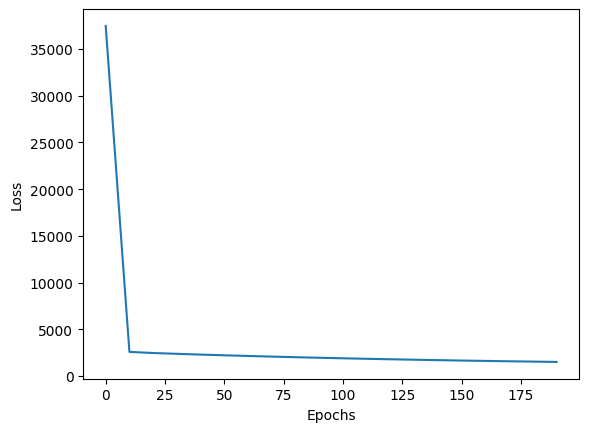

In [206]:
# plot the loss functions
plt.plot(epoch_values, losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

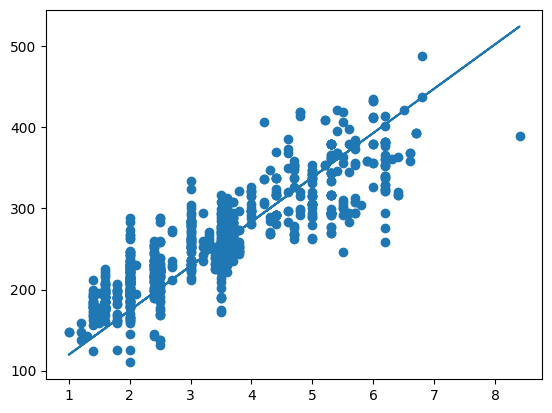

In [207]:
# visualizing the data
plt.scatter(x_train, y_train)
plt.plot(x_train, final_weights* x_train + final_bias)
